In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

In [99]:
from datetime import datetime

## EDA

In [7]:
df = pd.read_csv('./breast-cancer-wisconsin.csv', header = None)

In [37]:
df.head()

,id,Clump_Thickness,Cell_Size,Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
df.columns = ['id', 'Clump_Thickness','Cell_Size','Cell_shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size',
              'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

In [88]:
df.shape

(683, 11)

In [90]:
## List incomplete columns
df.columns[df.isna().any()].tolist()

[]

In [91]:
df.dtypes

id                              int64
Clump_Thickness                 int64
Cell_Size                       int64
Cell_shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated(keep = False)]

In [ ]:
df.drop(df[df.duplicated()].index, inplace = True)

In [92]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [94]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [95]:
df['Bare_Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [49]:
df = df.replace('?', np.nan)

In [55]:

df = df.dropna()

Number of Benign:  444
Number of Malignant :  239


C:\Users\Wanchen\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


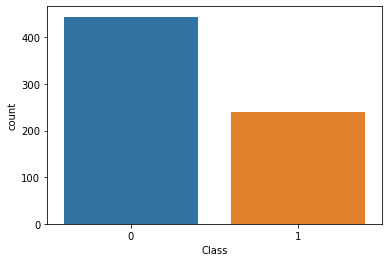

In [74]:
ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [75]:
df.describe()

,Clump_Thickness,Cell_Size,Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [39]:
# Convert class to binary
df['Class']=df['Class'].map({4:1,2:0})

In [40]:
df.head()

,id,Clump_Thickness,Cell_Size,Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Correlation matrix

<AxesSubplot:>

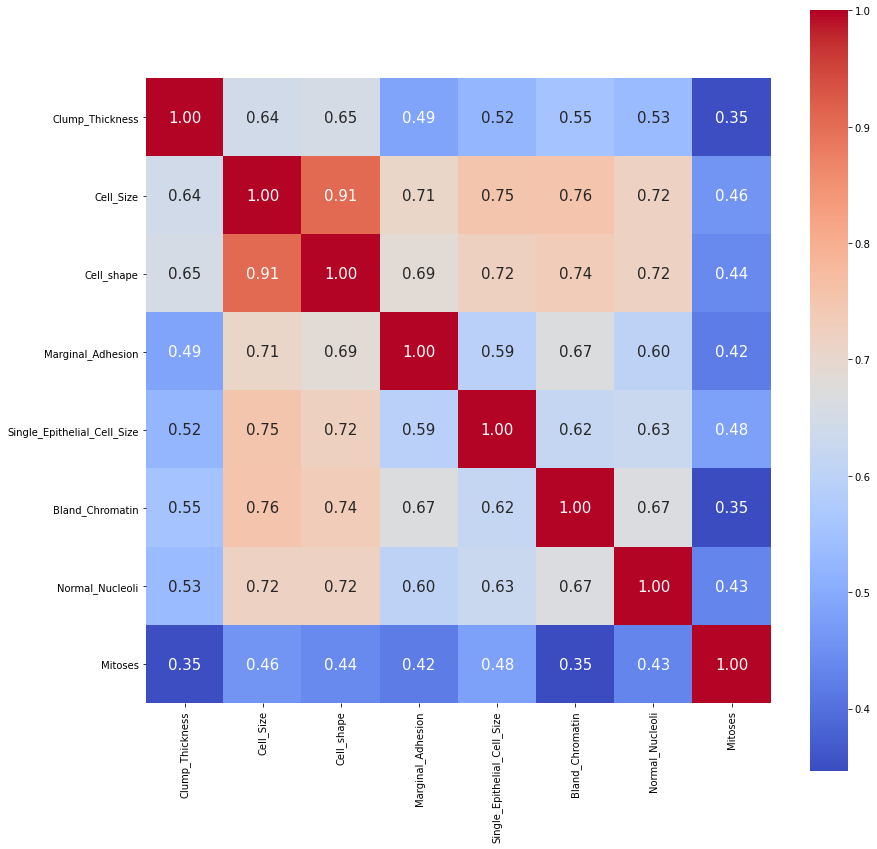

In [76]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = x.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

## observation

Cell Size and cell shape are highly correlated so we will use cell size for training.


C:\Users\Wanchen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


IndexError: index 2 is out of bounds for axis 0 with size 2

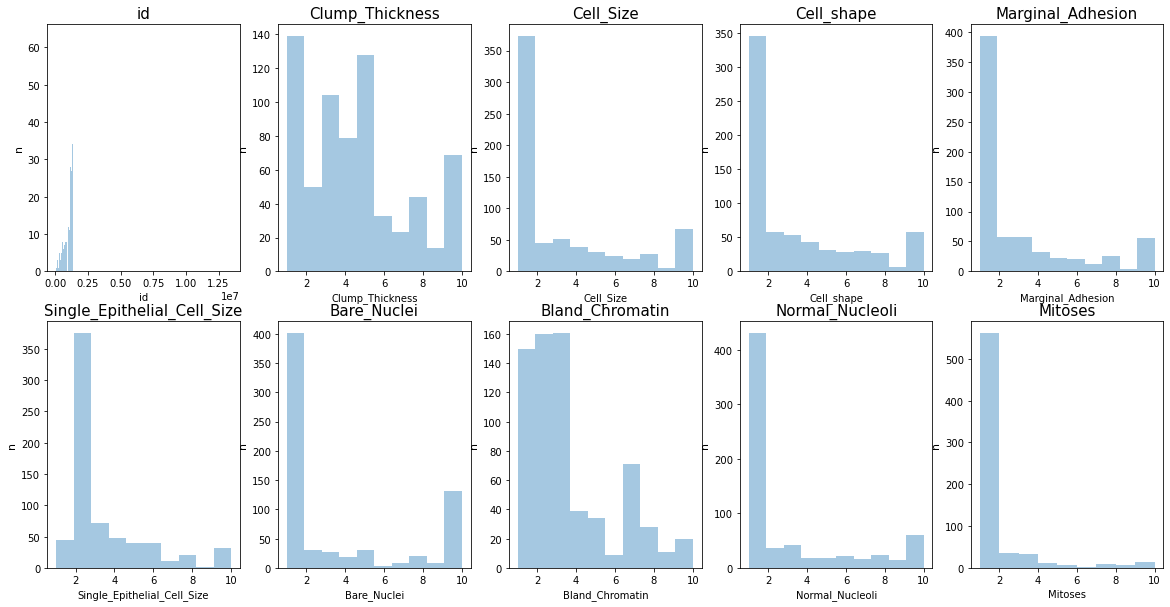

In [96]:
num_data = df._get_numeric_data() # seperate numerical features

# plot distributions of all numerical features
fig, axes = plt.subplots(2,5, figsize=[20,10])
for i, column in enumerate(num_data.columns):  
    ax_row = i//5
    ax_col = i%5
    bins = len(num_data[column].unique()) # no. bins = number of values
    axes[ax_row, ax_col].set_title(column, size=15) # add title
    axes[ax_row, ax_col].set_ylabel('n', size=11) # add label
    sns.distplot(num_data[column], bins=bins, ax=axes[ax_row, ax_col], 
                 kde=False) # kernel density estimation -> count
fig.tight_layout()

## Data Splitting
Define features and target and seperate into arrays

In [ ]:
y = df.Class.values
x = df.drop(['Class','id'],axis = 1 ).values

Splitted dataset into training, test, and validation sets

In [102]:
#now split our data into train and test
#train, test = train_test_split(df, test_size = 0.3)# in this our main data is splitted into train and test


# Seperate dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 20% test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 20% val
# we can check their dimension
print(train.shape)
print(test.shape)

(478, 11)
(205, 11)


In [78]:
#prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
#prediction_var=
train_y=train.Class
train_X = train.drop(['Class', 'id','Cell_shape'], axis = 1)# taking the training data input 
# This is output of our training data
# same we have to do for test
test_y=test.Class
test_X = test.drop(['Class', 'id','Cell_shape'], axis = 1) #output value of test dat

In [58]:
test_y.head()

588    1
535    0
104    1
662    0
196    0
Name: Class, dtype: int64

# Model selection
## Random Forest

In [62]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [79]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier()

In [80]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [81]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy

0.9609756097560975

### Visualization

In [97]:
dot_data = export_graphviz(model.estimators_[2], out_file="RFR_baseline.dot", max_depth=2, feature_names=feature_list)

with open("RFR_baseline.dot") as f:
    graph = f.read()
graphviz.Source(graph)

NameError: name 'export_graphviz' is not defined

In [87]:
metrics.fbeta_score(test_y, prediction, beta = 0.5)

0.9366391184573004

## Hyperparameter tuning
## Cross-validataion

In [106]:

# start timer
starttime = datetime.now()

# initialize CV
cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)

# define the model
RFR_tuned = RandomForestClassifier(random_state=1, n_jobs=-1) 

# define hyper parameter search space
hp_space = dict() 
hp_space['n_estimators'] = [1,2,5,10,30,100,500,1000,2000]
hp_space['max_features'] = [2,3,5,7,12]
hp_space['max_depth'] = [2,5,7,10]

# define search
search = GridSearchCV(RFR_tuned, hp_space, 
                      cv=cv_inner,  
                      n_jobs=-1)

# execute search
result = search.fit(X_train, y_train)


print('time taken for gridsearch: {}'.format(datetime.now()-starttime))

# get the best performing model fit on the whole training set
best_RFR_tuned = result.best_estimator_

# evaluate model on the hold out dataset
y_val_pred = best_RFR_tuned.predict(X_validation)

# evaluate the tuned model
tuned_f1 = metrics.fbeta_score(y_validation, y_val_pred, beta = 0.5)

# report progress
print('Validation F1: {}'.format(tuned_f1))
print('Associated parameters: {}'.format(result.best_params_))

time taken for gridsearch: 0:17:12.014165
Validation F1: 0.9130434782608696
Associated parameters: {'max_depth': 2, 'max_features': 2, 'n_estimators': 500}


In [107]:
RFR_tuned.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## Assess feature importance


Text(0.5, 1.0, 'Feature Importance')

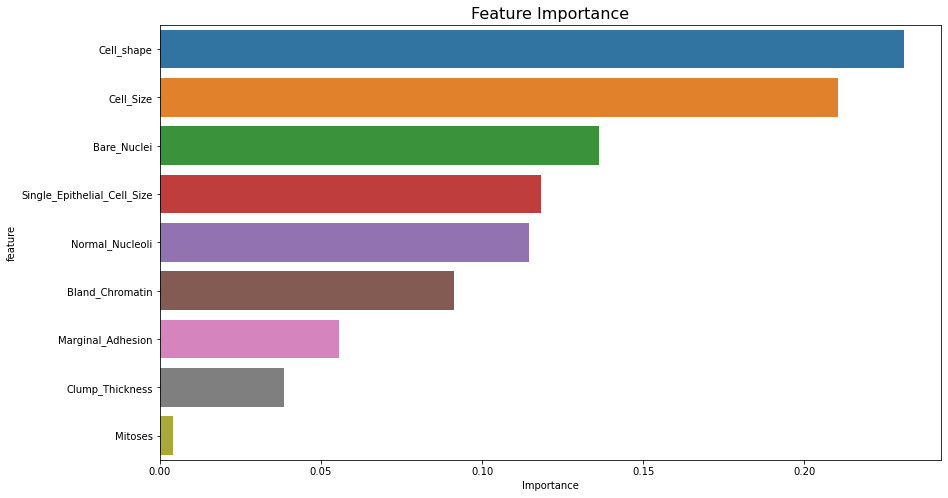

In [109]:

# Create dataframe of features and their importance
feat_imp = pd.DataFrame({'Importance':best_RFR_tuned.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp.reset_index(inplace=True, drop=True)

# Plot
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x='Importance', y='feature', data=feat_imp, ax=ax)
ax.set_title('Feature Importance', size=16)

## Confusion matrix

<Figure size 432x288 with 0 Axes>

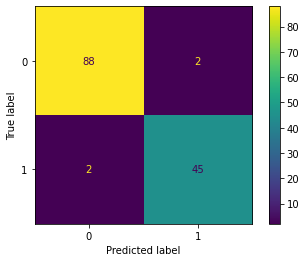

In [113]:
# Compute confusion matrix
y_test_pred = best_RFR_tuned.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

# Plot non-normalized confusion matrix
plt.figure()
metrics.plot_confusion_matrix(best_RFR_tuned, X_test, y_test)

In [ ]:
## Downweight false positive
weighting_factor = 2 # higher = more false positives but less false negatives
class_weights={0:1,1:weighting_factor}

RFC_tuned_weighted = RandomForestClassifier(random_state=1,
                                   n_jobs=-1, 
                                   class_weight=class_weights) 

## SVM

In [82]:
# lets now try with SVM
model2 = svm.SVC()
model2.fit(train_X,train_y)
prediction2=model2.predict(test_X)
metrics.accuracy_score(prediction2,test_y)

0.9560975609756097

In [86]:
metrics.fbeta_score(test_y, prediction2, beta = 0.5)

0.9264305177111716

Both model gave good accuracy score.

In [84]:
featimp = pd.Series(model.feature_importances_, index = train_X.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

Cell_Size                      0.264364
Bare_Nuclei                    0.219555
Bland_Chromatin                0.151681
Single_Epithelial_Cell_Size    0.140434
Normal_Nucleoli                0.103939
Clump_Thickness                0.068794
Marginal_Adhesion              0.043912
Mitoses                        0.007321
dtype: float64
